<a href="https://colab.research.google.com/github/jyotidabass/Predict-heart-related-diseases/blob/main/Heartdiseaseprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
data=pd.read_csv("/content/sample_data/heart_2020_cleaned.csv")

In [ ]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [ ]:
data.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No
319794,No,46.56,No,No,No,0,0,No,Female,80 or older,Hispanic,No,Yes,Good,8,No,No,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
data.shape

(319795, 18)

In [ ]:
data.describe

<bound method NDFrame.describe of        HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No               3   
1                No  20.34      No              No    Yes               0   
2                No  26.58     Yes              No     No              20   
3                No  24.21      No              No     No               0   
4                No  23.71      No              No     No              28   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No               7   
319791           No  29.84     Yes              No     No               0   
319792           No  24.24      No              No     No               0   
319793           No  32.81      No              No     No               0   
319794           No  46.56      No              No     No               0   

        MentalHealth DiffWalking     Sex 

In [ ]:
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

No     0.914405
Yes    0.085595
Name: HeartDisease, dtype: float64


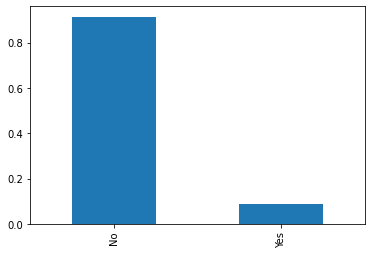

In [ ]:
data['HeartDisease'].value_counts(normalize=True).plot(kind='bar')
print(data['HeartDisease'].value_counts(normalize=True))

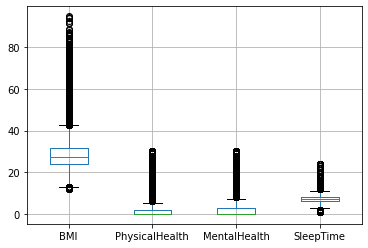

In [ ]:
data[['BMI','PhysicalHealth','MentalHealth','SleepTime']].boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f594332e910>,
      dtype=object)

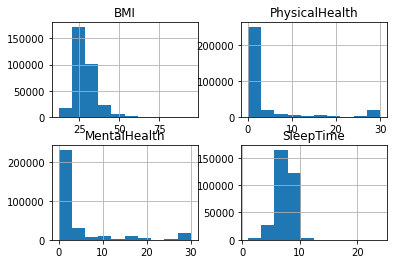

In [ ]:
data[['BMI','PhysicalHealth','MentalHealth','SleepTime']].hist()

In [ ]:
colors=[]

In [ ]:
for lab,row in data.iterrows():
  if row['HeartDisease']=='Yes':colors.append('red')
  else:
    colors.append('green')

In [ ]:
colors[0:5]

['green', 'green', 'green', 'green', 'green']

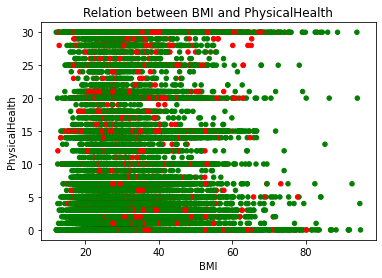

In [ ]:
data.plot(x='BMI',
          y='PhysicalHealth',
          title='Relation between BMI and PhysicalHealth',
          kind='scatter',
          c=colors,
          legend=['Yes','No'])

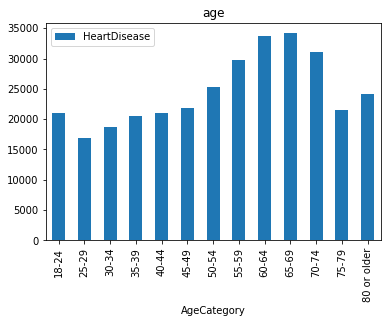

In [ ]:
data[data['HeartDisease']=='Yes'].groupby('AgeCategory').agg({'HeartDisease':'count'})
data.groupby('AgeCategory').agg({'HeartDisease':'count'}).plot(kind='bar',title='age')

In [ ]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

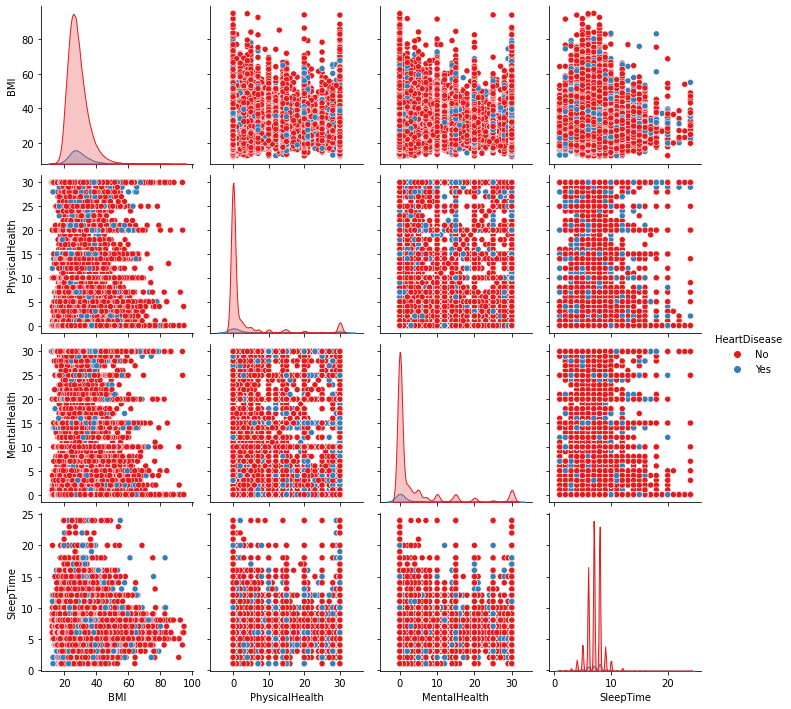

In [ ]:
sns.pairplot(data=data, hue='HeartDisease', palette='Set1')

In [ ]:
le=LabelEncoder()

In [ ]:
data_transformed= data

In [ ]:
data_transformed.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
data_transformed['HeartDisease']= le.fit_transform(data_transformed['HeartDisease'])
data_transformed['Stroke']= le.fit_transform(data_transformed['Stroke'])
data_transformed['Smoking']= le.fit_transform(data_transformed['Smoking'])
data_transformed['AlcoholDrinking']= le.fit_transform(data_transformed['AlcoholDrinking'])
data_transformed['Stroke']= le.fit_transform(data_transformed['Stroke'])
data_transformed['DiffWalking']= le.fit_transform(data_transformed['DiffWalking'])
data_transformed['Sex']= le.fit_transform(data_transformed['Sex'])
data_transformed['Race']= le.fit_transform(data_transformed['Race'])
data_transformed['Diabetic']= le.fit_transform(data_transformed['Diabetic'])
data_transformed['PhysicalActivity']= le.fit_transform(data_transformed['PhysicalActivity'])
data_transformed['Asthma']= le.fit_transform(data_transformed['Asthma'])
data_transformed['KidneyDisease']= le.fit_transform(data_transformed['KidneyDisease'])
data_transformed['SkinCancer']= le.fit_transform(data_transformed['SkinCancer'])
data_transformed.head(20)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,55-59,5,2,1,Very good,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,80 or older,5,0,1,Very good,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,65-69,5,2,1,Fair,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,75-79,5,0,0,Good,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,40-44,5,0,1,Very good,8,0,0,0
5,1,28.87,1,0,0,6,0,1,0,75-79,2,0,0,Fair,12,0,0,0
6,0,21.63,0,0,0,15,0,0,0,70-74,5,0,1,Fair,4,1,0,1
7,0,31.64,1,0,0,5,0,1,0,80 or older,5,2,0,Good,9,1,0,0
8,0,26.45,0,0,0,0,0,0,0,80 or older,5,1,0,Fair,5,0,1,0
9,0,40.69,0,0,0,0,0,1,1,65-69,5,0,1,Good,10,0,0,0


In [ ]:
age_counted=data_transformed['AgeCategory'].value_counts(sort=True)

In [ ]:
age_counted.sort_index()

18-24          21064
25-29          16955
30-34          18753
35-39          20550
40-44          21006
45-49          21791
50-54          25382
55-59          29757
60-64          33686
65-69          34151
70-74          31065
75-79          21482
80 or older    24153
Name: AgeCategory, dtype: int64

In [ ]:
for lab,row in data_transformed.iterrows():
  if row['AgeCategory']=='18-24':row['AgeCategory']=0
  elif row['AgeCategory']=='25-29':row['AgeCategory']=1
  elif row['AgeCategory']=='30-34':row['AgeCategory']=2
  elif row['AgeCategory']=='35-39':row['AgeCategory']=3
  elif row['AgeCategory']=='40-44':row['AgeCategory']=4
  elif row['AgeCategory']=='45-49':row['AgeCategory']=5
  elif row['AgeCategory']=='50-54':row['AgeCategory']=6
  elif row['AgeCategory']=='55-59':row['AgeCategory']=7
  elif row['AgeCategory']=='60-64':row['AgeCategory']=8
  elif row['AgeCategory']=='65-69':row['AgeCategory']=9
  elif row['AgeCategory']=='70-74':row['AgeCategory']=10
  elif row['AgeCategory']=='75-79':row['AgeCategory']=11
  else: row['AgeCategory'] = 12


In [ ]:
AgeNumber =[]

In [ ]:
for lab, row in data_transformed.iterrows():
  if row['AgeCategory']=='18-24': AgeNumber.append(0)
  elif row['AgeCategory']=='25-29': AgeNumber.append(1)
  elif row['AgeCategory']=='30-34': AgeNumber.append(2)
  elif row['AgeCategory']=='35-39': AgeNumber.append(3)
  elif row['AgeCategory']=='40-44': AgeNumber.append(4)
  elif row['AgeCategory']=='45-49': AgeNumber.append(5)
  elif row['AgeCategory']=='50-54': AgeNumber.append(6)
  elif row['AgeCategory']=='55-59': AgeNumber.append(7)
  elif row['AgeCategory']=='60-64': AgeNumber.append(8)
  elif row['AgeCategory']=='65-69': AgeNumber.append(9)
  elif row['AgeCategory']=='70-74': AgeNumber.append(10)
  elif row['AgeCategory']=='75-79': AgeNumber.append(11)
  else: row['AgeCategory']= AgeNumber.append(12)

In [ ]:
AgeNumber[0:10]

[7, 12, 9, 11, 4, 11, 10, 12, 12, 9]

In [ ]:
data_transformed['AgeCategory'] =AgeNumber

In [ ]:
data_transformed['GenHealth'].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [ ]:
GenHealth=[]

In [ ]:
for lab, row in data_transformed.iterrows():
  if row['GenHealth']=='poor':GenHealth.append(0)
  elif row['GenHealth']=='Fair':GenHealth.append(1)
  elif row['GenHealth']=='Good':GenHealth.append(2)
  elif row['GenHealth']=='veryGood':GenHealth.append(3)
  else:GenHealth.append(4)

In [ ]:
data_transformed['GenHealth'] = GenHealth

In [ ]:
data_transformed.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0


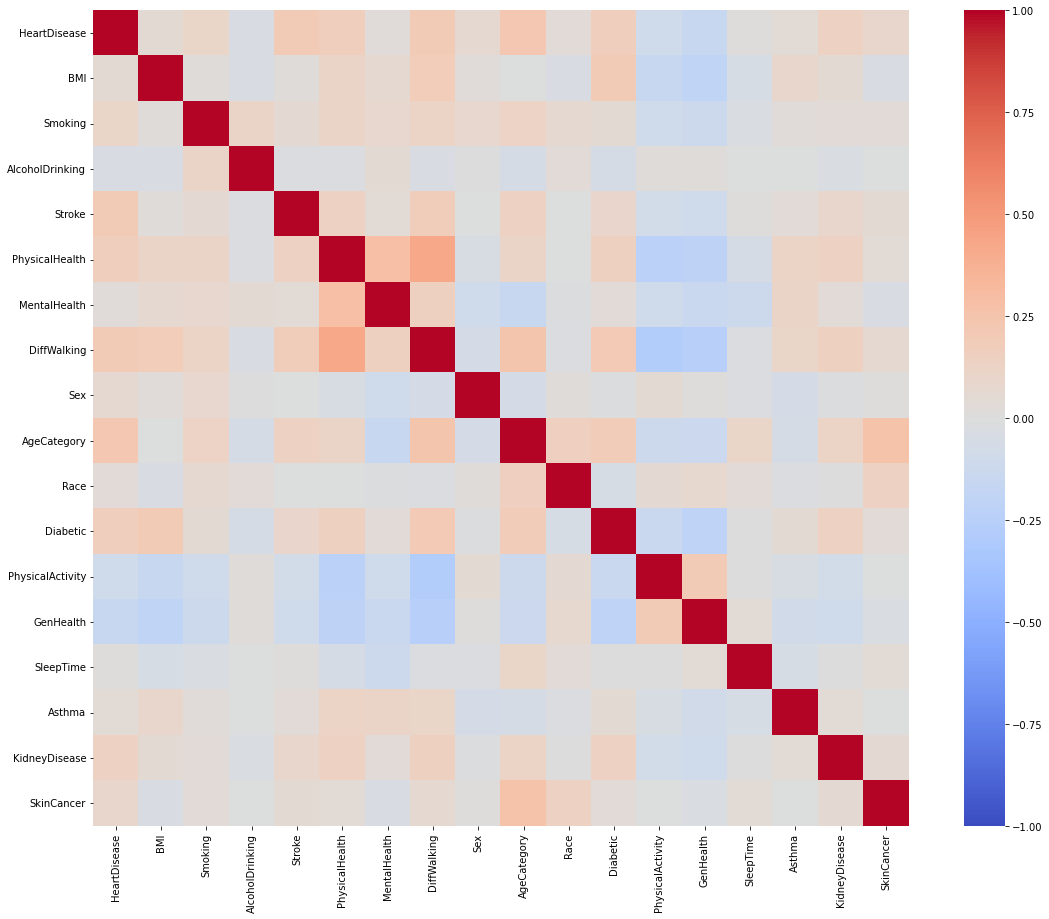

In [ ]:
corr= data_transformed.corr()
graph=sns.heatmap(corr, vmax=1,vmin=-1,center=0, square=True, cmap='coolwarm')
graph.figure.set_size_inches(20,15)

In [ ]:
predict_var=data.iloc[:,1:18].values
target_var=data.iloc[:,0].values

In [ ]:
x_training, x_testing,y_training,y_testing=train_test_split(predict_var,
                                                            target_var,
                                                            test_size=0.3,
                                                            random_state=0)

In [ ]:
dTree=DecisionTreeClassifier()

In [ ]:
dTree.fit(x_training,y_training)

DecisionTreeClassifier()

In [ ]:
export_graphviz(dTree,out_file='tree.dot')

In [ ]:
predictions=dTree.predict(x_testing)
predictions

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
confusionmatrix= confusion_matrix(y_testing, predictions)
confusionmatrix

array([[80921,  6809],
       [ 6221,  1988]])

In [ ]:
accuracy=accuracy_score(y_testing,predictions)
accuracy

0.8641845339225966

In [ ]:
error=1-accuracy
error

0.13581546607740336

In [ ]:
print('Accuracy='+str(accuracy))
print('Error='+str(error))

Accuracy=0.8641845339225966
Error=0.13581546607740336


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


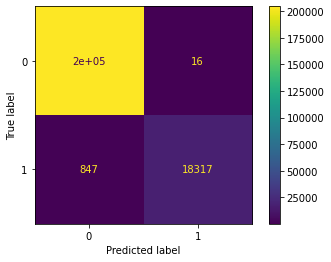

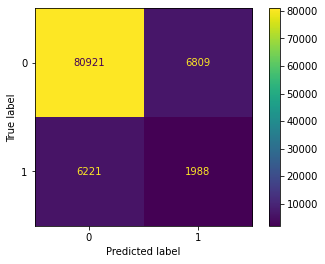

In [ ]:
plot_confusion_matrix(dTree, x_training, y_training)
plot_confusion_matrix(dTree, x_testing, y_testing)